<div style="border:1px solid black; padding:10px 10px;">
    <strong>CIVIL-321 "Modélisation Numérique des Solides et Structures"</strong><br/><br/>
    <span style="text-decoration:underline;font-weight:bold;">Comment utiliser ce Jupyter Notebook?
    </span><br/><br/>
    Ce <strong>Notebook</strong> est constitué de cellules de texte et de cellule de code. Les cellules de codes doivent être  <strong>executées</strong> pour voir le résultat du programme. Certaines cellules doivent être remplies par vos soins. Pour exécuter une cellule, cliquez dessus simplement et ensuite cliquez sur le bouton "play" (<span style="font: bold 12px/30px Arial, serif;">&#9658;</span>) dans la barre de menu au dessus du notebook. Vous pouvez aussi taper la combinaison de touches <code>shift + enter</code>. Il est important d'éxécuter les cellules de code en respectant leur ordre d'arrivée dans le notebook.
</div>

On vous encourage à poser vos questions et donner votre feedback sur ce notebook sur la plateforme ED Discussion du cours accessible en cliquant sur ce bouton:
 
 
 
<div class="container" >
        <a href="https://edstem.org/eu/courses/409/discussion?category=Exercices">
            <button class="btn btn-primary btn-lg">Ed Discussion</button>
        </a>
</div>

# Poutres de Bernoullis

In [1]:
from plot import *

## Exercice 1 : Matrice de rigidité

#### Question 

Intégrer la matrice de rigidité d’un élément poutre de type Bernoulli travaillant uniquement en flexion.

![](Images/Poutre1.png)

---

 **Solution:**

 ---



![](Images/Poutre3.png)

Sans charge distribuée, l'équation différentielle d'équilibre transversale d'une poutre (cf. Figure précédente) peut-être intégrée successivement pour trouver l'expression de l'effort tranchant $V(x)$, du moment $M(x)$, de la rotation $\frac{dv}{dx}$ et du déplacement transversal $v$.

\begin{align}
  EI\frac{d^4v}{dx^4} &= 0 \\
  EI\frac{d^3v}{dx^3} &= c_1 = -V(x) \label{eq:v}\\
  EI\frac{d^2v}{dx^2} &= c_1x + c_2 = -M(x) \label{eq:m}\\
  EI\frac{dv}{dx} &= c_1\frac{x^2}{2} + c_2x + c_3 \\
  EIv &= c_1\frac{x^3}{6} + c_2\frac{x^2}{2} + c_3x + c_4
\end{align}

Le déplacement et la rotation au bord gauche de la poutre sont nommés respectivement $u_1$ et $u_2$ au bord gauche de la poutre et $u_3$ et $u_4$ pour le bord droit. Exprimons les en fonction des constantes $c_1$, $c_2$, $c_3$ et $c_4$ définies ci-dessus.
\begin{align}
  u_1 &= v(0) = \frac{1}{EI}c_4 \\
  u_2 &= \frac{dv}{dx}(0) = \frac{1}{EI}c_3 \\
  u_3 &= v(L) = \frac{1}{EI}\left[ c_1\frac{L^3}{6} + c_2\frac{L^2}{2} + c_3L + c_4 \right] \\
  u_4 &= \frac{dv}{dx}(L) = \frac{1}{EI}\left[ c_1\frac{L^2}{2} + c_2L + c_3 \right]
\end{align}

Sous forme matricielle:

\begin{align}
  \left[
    \begin{array}{cccc}
      0 & 0 & 0 & \frac{1}{EI} \\
      0 & 0 & \frac{1}{EI} & 0 \\
      \frac{L^3}{6EI} & \frac{L^2}{2EI} &\frac{L}{EI} & \frac{1}{EI} \\
      \frac{L^2}{2EI} & \frac{L}{EI} &\frac{1}{EI} & 0
    \end{array}
  \right]
  \left\{
    \begin{array}{c}
      c_1 \\ c_2 \\ c_3 \\ c_4
    \end{array}
  \right\} =
  \left\{
    \begin{array}{c}
      u_1 \\ u_2 \\ u_3 \\ u_4
    \end{array}
  \right\}
\end{align}

La résolution du système par inversion de matrice nous donne:

\begin{align}
  \left\{
    \begin{array}{c}
      c_1 \\ c_2 \\ c_3 \\ c_4
    \end{array}
  \right\} =
  \left[
    \begin{array}{cccc}
      \frac{12EI}{L^3} & \frac{6EI}{L^2} & -\frac{12EI}{L^3} & \frac{6EI}{L^2} \\
      -\frac{6EI}{L^2} & -\frac{4EI}{L} & \frac{6EI}{L^2} & -\frac{2EI}{L} \\
      0 & EI & 0 & 0 \\
      EI & 0 & 0 & 0
    \end{array}
  \right]
  \left\{
    \begin{array}{c}
      u_1 \\ u_2 \\ u_3 \\ u_4
    \end{array}
  \right\}
\end{align}

En remplacant les valeurs des constantes dans les équations précédentes, on peut exprimer les moments et les efforts tranchants aux noeuds 1 et 2 en fonction des inconnues cinématiques $u_i$:

\begin{align}
  V(0) &= -V_1 \Longrightarrow V_1 = c_1 = \frac{12EI}{L^3}u_1 + \frac{6EI}{L^2}u_2 - \frac{12EI}{L^3}u_3 + \frac{6EI}{L^2}u_4 \\
  M(0) &= M_1 \Longrightarrow M_1 = -c_2 = \frac{6EI}{L^2}u_1 + \frac{4EI}{L}u_2 - \frac{6EI}{L^2}u_3 + \frac{2EI}{L}u_4 \\
  V(L) &= V_2 \Longrightarrow V_2 = -c_1 = -\frac{12EI}{L^3}u_1 - \frac{6EI}{L^2}u_2 + \frac{12EI}{L^3}u_3 - \frac{6EI}{L^2}u_4 \\
  M(L) &= -M_2 \Longrightarrow M_2 = c_1L + c_2 = \frac{6EI}{L^2}u_1
  + \frac{2EI}{L}u_2 - \frac{6EI}{L^2}u_3 + \frac{4EI}{L}u_4
\end{align}

Sous forme matricielle:

\begin{align}
  \left[
    \begin{array}{cccc}
      \frac{12EI}{L^3} & \frac{6EI}{L^2} & -\frac{12EI}{L^3} & \frac{6EI}{L^2} \\
      \frac{6EI}{L^2} & \frac{4EI}{L} & -\frac{6EI}{L^2} & \frac{2EI}{L} \\
      -\frac{12EI}{L^3} & -\frac{6EI}{L^2} & \frac{12EI}{L^3} & -\frac{6EI}{L^2} \\
      \frac{6EI}{L^2} & \frac{2EI}{L} & -\frac{6EI}{L^2} & \frac{4EI}{L}
    \end{array}
  \right]
  \left\{
    \begin{array}{c}
      u_1 \\ u_2 \\ u_3 \\ u_4
    \end{array}
  \right\} =
  \left\{
    \begin{array}{c}
      V_1 \\ M_1 \\ V_2 \\ M_2
    \end{array}
  \right\}
  \label{eq:soln_first}
\end{align}

Nous obtenons ainsi à droite le vecteur des forces nodales en fonction des inconnues cinématiques. La matrice 4x4 correspond donc à la matrice de rigidité de l'élément poutre dans la direction transversale.

#### Question 

À partir de la matrice obtenue, dérivez la matrice de rigidité d’un élément poutre de Bernoulli dont l'extrémité droite est une rotule

![](Images/Poutre2.png)

---

 **Solution:**

 ---



La matrice de rigidité d'une poutre avec une rotule à droite peut être calculée par condensation d'un degré de liberté (chapitre 2.6 du TGC 6). Dans le cas d'une rotule à droite, le degré de liberté condensé correspond à $M_2$ qui est nul à la rotule. Dans ce cas, la représentation matricielle est ainsi partitionnée comme suit:

\begin{align}
  \left[
       \begin{array}{cc}
      K_{11} & K_{12}\\
      K_{21} & K_{22}
    \end{array}
  \right]
  \left\{
    \begin{array}{c}
      d_1 \\ d_2
    \end{array}
  \right\} =
  \left\{
    \begin{array}{c}
      f_1 \\ f_2
       \end{array}
  \right\}
\end{align}

où les différentes composantes de la matrice de rigidité sont

\begin{align}
  K_{11} = \left[
    \begin{array}{ccc}
      \frac{12EI}{L^3} & \frac{6EI}{L^2} & -\frac{12EI}{L^3} \\
      \frac{6EI}{L^2} & \frac{4EI}{L} & -\frac{6EI}{L^2} \\
      -\frac{12EI}{L^3} & -\frac{6EI}{L^2} & \frac{12EI}{L^3}
       \end{array}
  \right]
  ,
  K_{12} = \left[
       \begin{array}{c}
      \frac{6EI}{L^2} \\ \frac{2EI}{L} \\ -\frac{6EI}{L^2}
    \end{array}
  \right]
  ,
  K_{21} = \left[
    \begin{array}{ccc}
      \frac{6EI}{L^2} & \frac{2EI}{L} & -\frac{6EI}{L^2}
       \end{array}
  \right]
  ,
  K_{22} = \left[ \frac{4EI}{L} \right]
\end{align}

alors que les inconnues cinématiques et les forces nodales sont
partionnées par:

\begin{align}
  d_{1} = \left\{
       \begin{array}{c}
      u_1 \\ u_2 \\ u_3
       \end{array}
  \right\}
  ,
  d_{2} = \left\{ u_4 \right\}
  ,
  f_{1} = \left\{
       \begin{array}{c}
      V_1 \\ M_1 \\ V_2
       \end{array}
  \right\}
  ,
  f_{2} = \left\{ M_2 \right\} = 0.
\end{align}

Le système d'équation peut s'écrire comme

\begin{align}
  f_1 &= K_{11}d_1 + K_{12}d_2 \label{eq:f1}\\
  f_2 &= K_{21}d_1 + K_{22}d_2 \label{eq:d2}
\end{align}

En isolant $d_2$, on obtient

\begin{align}
  d_2 &= K_{22}^{-1}\left(f_2 - K_{21}d_1\right)
\end{align}

puis en introduisant ce résultat :

\begin{align}
  f_1 &= K_{11}d_1 + K_{12} \left[ K_{22}^{-1}\left(f_2 -
      K_{21}d_1\right) \right] \label{eq:f1fin}
\end{align}

La matrice obtenue par condensation s'écrit comme

\begin{align}
  \left[ k_c \right] \left\{ d_1 \right\} &= \left\{ f_c \right\}.
\end{align}

où $k_c$ et $f_c$ sont respectivement la matrice de rigidité et le vecteur force obtenue par consensation du degré de liberté $M_2$. $k_c$ est donc la matrice de rigidité d'une poutre avec une rotule sur son bord droit et vaut :

\begin{align}
  k_c = K_{11} - K_{12}K_{22}^{-1}K_{21} = \left[
    \begin{array}{ccc}
      \frac{3EI}{L^3} & \frac{3EI}{L^2} & -\frac{3EI}{L^3} \\
      \frac{3EI}{L^2} & \frac{3EI}{L} & -\frac{3EI}{L^2} \\
      -\frac{3EI}{L^3} & -\frac{3EI}{L^2} & \frac{3EI}{L^3}
    \end{array}
  \right]
\end{align}

## Exercice 2

Trouvons les déplacements et rotations de la poutre définie par la figure suivante avec :

In [2]:
E = 3000e7 #N/m2
M_barre = 3600000 #N·m
q = 600000 #N/m

I1 = 250000e-8 #m4, 
I2 = 128000e-8 #m4, 

L1 = 10 #m
L2 = 8 #m 

A1 = 0.2 #m2
A2 = 0.1 #m2

![](Images/Poutre4.PNG)

On peut supposer que la poutre n'a pas de déplacements axiaux (que de la flexion)

#### Question
Completer le code de la cellule suivate permettant de connaitre la matrice de rigidité, connaissant E, I et L. Donner ensuite les matrices de rigidité locales pour les éléments 1 et 2

In [3]:
# Code à completer 
def MatriceRigiditePoutre(E, I, L):
    K = (E*I/L**3)*np.array([
        ['?', '?', '?', '?'],
        ['?', '?', '?', '?'],
        ['?', '?', '?', '?'],
        ['?', '?', '?', '?']
    ])
    return(K)

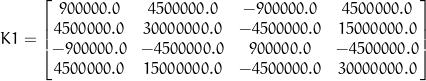

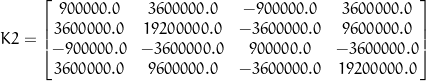

In [4]:
#SolutionToRemove
def MatriceRigiditePoutre(E, I, L):
    K = (E*I/L**3)*np.array([
        [12, 6*L, -12, 6*L],
        [6*L, 4*L**2, -6*L, 2*L**2],
        [-12, -6*L, 12, -6*L],
        [6*L, 2*L**2, -6*L, 4*L**2]
    ])
    return(K)

#Element 1
K1 = MatriceRigiditePoutre(E, I1, L1)
plot_matrix(K1, 'K1')

#Element 2
K2 = MatriceRigiditePoutre(E, I2, L2)
plot_matrix(K2, 'K2')

#### Question

Calculer simplement les coefficients de la matrice de rigidité globale. Vérifier la cohérence de votre résultat avec la position de vos zéros.

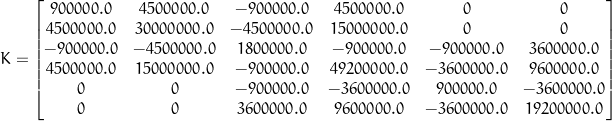

In [5]:
#SolutionToRemove

K = np.zeros((6, 6)) # Matrice de rigidité globale
K[:4, :4] = K1
K[2:, 2:] = K[2:, 2:] + K2

plot_matrix(K, 'K')

#### Question

Donnez la dimension des vecteurs de force consistante et déplacements. Puis identifiez les degrés de libertés bloqués et ainsi que les forces imposées.

---

 **Solution:**

 ---



$$ f_g = \left\{
    \begin{array}{cr}
    R_{v_0} &réaction\\
    R_{\theta_0} &réaction \\
    R_{v_1} &réaction \\%-qL_1/2 \\
    qL_1^2/12 &imposé\\
    R_{v_2} &réaction\\
    -\overline{M} &imposé
    \end{array}
    \right\} 
$$

#### Question

Calculer le moment au noeud 1 et 2, puis en déduire les rotations associées $\theta_1$ et $\theta_2$. (vous pouvez aussi programmer la résolution dans la cellule)

In [6]:
#SolutionToRemove

R_theta1 = (q*L1**2)/12
R_theta2 = - M_barre

# Matrice de raideur réduite due aux conditions aux limites :
K_red = K[3:, 3:]
K_red = np.delete(K_red, 1, 0) # La nouvelle matrice est une matrice 3x3 correspondant aux ddls u2, v2 et theta2
K_red = np.delete(K_red, 1, 1)

# vecteur de force réduit :
f_vec = np.array([[R_theta1], [R_theta2]])

# Solution
deplacement = np.linalg.inv(K_red)@f_vec
print('rotation au noeud 1 [rad]', deplacement[0])
print('rotation au noeud 2 [rad]', deplacement[1])

rotation au noeud 1 [rad] [0.15315315]
rotation au noeud 2 [rad] [-0.26407658]


#### Question

Le bout de code suivant permet de représenter graphiquement les déplacements de la poutre. Tracer la déformer de la poutre. Il est à noter que la structure initiale est représentée en pointillé bleu alors que la déformée est représentée en ligne continue grise.

(2, 1)
[[0, 0, 0], [0, 0, 0.15315315315315314], [0, 0, -0.26407657657657657]]


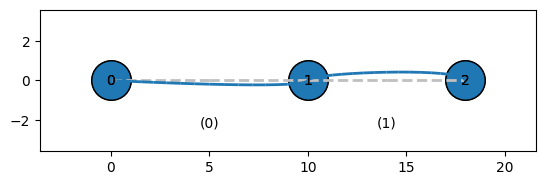

In [7]:
positions = np.array([
    [0, 0],
    [L1, 0],
    [L1+L2, 0]
])

conn = [
    [0, 1],
    [1, 2]
]

print(deplacement.shape)
displacement = [[0, 0, 0], [0, 0, deplacement[0, 0]], [0, 0, deplacement[1, 0]]]
print(displacement)
plot_structure(positions, conn, displacement = displacement)

#### Question

Calculer les déplacements lorsque seule la force $\boldsymbol{q}$ est appliquée, idem pour le moment $\overline{M}$. Que remarquez-vous au niveau des déformées ?

[[ 0.04054054]
 [-0.20777027]]


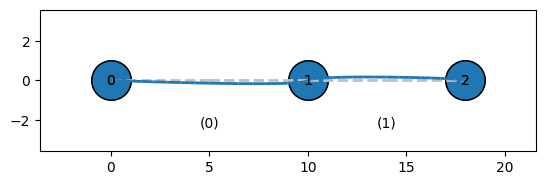

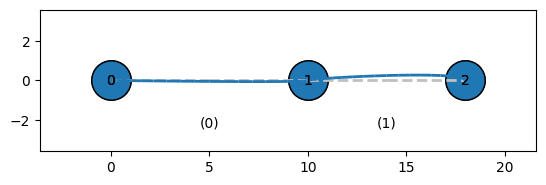

In [8]:
###########
# Solution:
##########


# Force q appliquée
f_q = np.array([[R_theta1], [0]])
depl_q = np.linalg.inv(K_red)@f_q
displ_q = [[0, 0, 0], [0, 0, float(depl_q[0, 0])], [0, 0, float(depl_q[1, 0])]]
plot_structure(positions, conn, displacement = displ_q)   
                
# Moment M appliqué
f_m = np.array([[0], [R_theta2]])
depl_m = np.linalg.inv(K_red)@f_m
print(depl_m)
displ_m = [[0, 0, 0], [0, 0, depl_m[0, 0]], [0, 0, depl_m[1, 0]]]
plot_structure(positions, conn, displacement = displ_m)   

# En superposant les déformées dues à q et à M, nous retouvons la déformée de la question précédente

#### Question

Quelles hypothèses permettent de faire une telle décomposition ? Dans quel cas cette décomposition est-elle utile?

---

 **Solution:**

 ---



Le principe de superpositon est appliquable lorsque l'on considère un problème linéaire et élastique, ainsi que des petites déformations. Cette décompositon est principalement utilisée lorsque l'on traite de problème à la main : les problèmes peuvent ainsi se décomposer en une somme de problèmes simples et faciles à résoudre.

# Exercice 3

Nous enlevons à présent l'appui à rouleau du noeud 1. Nous appliquons également une force horizontale au noeud 2: $F_2 = 5\cdot 10^8$ N. Il est donc nécessaire d'inclure les déplacements axiaux de la poutre.

In [9]:
F = 5e8 # [N]

#### Question

Modifier la fonction créée à l'exercice  précédent pour connaitre les nouvelles matrices de rigidité locales pour les éléments 1 et 2. Calculer ensuite la matrice de rigidité globale de la même façon que précédemment, vérifier sa cohérence.

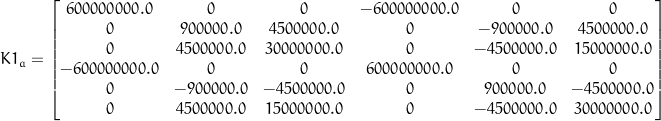

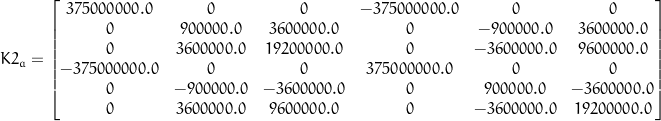

In [10]:
#SolutionToRemove

def MatriceRigiditePoutreAxiaux(E, I, L, A):
    K = (E*I/L**3)*np.array([
        [A*L**2/I, 0, 0, -A*L**2/I, 0, 0],
        [0, 12, 6*L, 0, -12, 6*L],
        [0, 6*L, 4*L**2, 0, -6*L, 2*L**2],
        [-A*L**2/I, 0, 0, A*L**2/I, 0, 0],
        [0, -12, -6*L, 0, 12, -6*L],
        [0, 6*L, 2*L**2, 0, -6*L, 4*L**2]
    ])
    return(K)

K1_a = MatriceRigiditePoutreAxiaux(E, I1, L1, A1)
plot_matrix(K1_a, 'K1_a')

K2_a = MatriceRigiditePoutreAxiaux(E, I2, L2, A2)
plot_matrix(K2_a, 'K2_a')

#### Question

Calculer les coefficients de la matrice de rigidité globale.

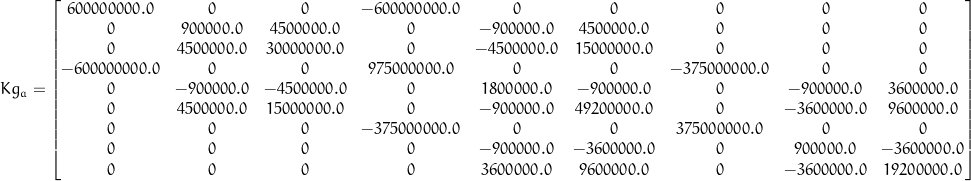

In [11]:
#SolutionToRemove

# Matrice de rigidité globale
Kg_a = np.zeros((9, 9)) 
Kg_a[:6, :6] = K1_a
Kg_a[3:, 3:] = Kg_a[3:, 3:] + K2_a
plot_matrix(Kg_a, 'Kg_a')

#### Question

Donnez la dimension des vecteurs de force consistante et déplacements. Puis identifiez les degrés de libertés bloqués et ainsi que les forces imposées.

---

 **Solution:**

 ---



$$ f_g = \left\{
    \begin{array}{cr}
    R_{u_1} & bloqué\\
    R_{v_1} & bloqué\\
    R_{\theta_1} & bloqué\\
    0 & imposé\\
    -qL_1/2 & imposé\\
    qL_1^2/12 & imposé\\
    F & imposé\\
    R_{v_3} & bloqué\\
    -\overline{M} & imposé
    \end{array}
    \right\}
$$

#### Question

Trouver les rotations $\theta_2$, $\theta_3$ ainsi que les déplacements $u_2$, $v_2$ et $u_3$.

In [12]:
###########
# Solution:
##########


# Matrice de raideur réduite due aux conditions aux limites :
K_red_a = Kg_a[3:, 3:]
K_red_a = np.delete(K_red_a, 4, 0) # Suppression de la ligne correspondant aux ddls v3
K_red_a = np.delete(K_red_a, 4, 1) # Suppression de la colonne correspondant aux ddls v3

# vecteur de force réduit :
f_vec = np.array([
    [0],
    [-q*L1/2],
    [q*L1**2/12],
    [F],
    [-M_barre]
])

# Solution
deplacement = np.linalg.inv(K_red_a)@f_vec
print('u1 [m]', deplacement[0])
print('v1 [m]', deplacement[1])
print('theta1 [m]', deplacement[2])
print('u2 [m]', deplacement[3])
print('theta2 [m]', deplacement[4])

u1 [m] [0.83333333]
v1 [m] [-1.98945148]
theta1 [m] [0.032173]
u2 [m] [2.16666667]
theta2 [m] [0.16943565]


#### Question

De la même façon que précédemment, observer la déformée de la poutre. Ce résultat vous semble-t-il cohérent ?

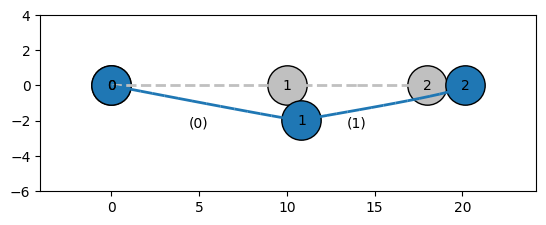

In [13]:
displacement = [[0, 0, 0], 
                [deplacement[0, 0], deplacement[1, 0], deplacement[2, 0]], 
                [deplacement[3, 0], 0, deplacement[4, 0]]]

plot_structure(positions, conn, displacement = displacement)